In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy
import math
import matplotlib.pyplot as plt
import statistics
from matplotlib.backends.backend_pdf import PdfPages


# WCZYTANIE I PRZYGOTOWANIE DANYCH

In [3]:
df = pd.read_csv("C:/Users/wypyc/Desktop/semestr 5/szeregi/raport_szeregi/D.csv", header = 0) 
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df = df[["Avg. Area Income", "Price"]]
df = df[df['Avg. Area Income'].notna()]
df = df[df['Price'].notna()]
df = df.sort_values(by='Avg. Area Income', ascending=True)
df = df[df["Avg. Area Income"]>0]
df.reset_index(drop=True, inplace=True)
df.rename(columns = {'Avg. Area Income':'przeciętny dochód','Price':'cena domu'}, inplace = True)

#df['MEDHHINC'].isna().sum()

In [5]:
price = df["cena domu"]
income = df["przeciętny dochód"]

# STATYSTYKI OPSIOWE

In [6]:
df.describe()

,przeciętny dochód,cena domu
count,5000.000000,5.000000e+03
mean,68583.108984,1.232073e+06
std,10657.991214,3.531176e+05
min,17796.631190,1.593866e+04
25%,61480.562388,9.975771e+05
50%,68804.286404,1.232669e+06
75%,75783.338666,1.471210e+06
max,107701.748378,2.469066e+06


In [7]:
type_checker = df["przeciętny dochód"][10]
type(type_checker)

numpy.float64

In [8]:
income_położenia = [np.mean(income), statistics.harmonic_mean(income), statistics.geometric_mean(income), np.median(income)]

price_położenia = [np.mean(price), statistics.harmonic_mean(price), statistics.geometric_mean(price), np.median(price)]


In [9]:
income_rozproszenia = [np.quantile(income,0.25), np.quantile(income,0.75), np.quantile(income,0.75) - np.quantile(income,0.25), 
                       np.var(income), np.std(income), np.std(income, ddof=1) / np.mean(income) * 100]

price_rozproszenia = [np.quantile(price,0.25), np.quantile(price,0.75), np.quantile(price,0.75) - np.quantile(price,0.25), 
                       np.var(price), np.std(price), np.std(price, ddof=1) / np.mean(price) * 100]
## ostatnie to współczynnik zmienności

In [10]:
income_inne = [scipy.stats.skew(income, axis=0, bias=True), scipy.stats.kurtosis(income) ]

price_inne = [scipy.stats.skew(price, axis=0, bias=True), scipy.stats.kurtosis(price) ]

In [11]:
położenia_df = pd.DataFrame([income_położenia, price_położenia], 
                       columns = ["śr. arytm.","śr.harm.","śr. geom.","mediana"],
                      index = ["przeciętny dochód","cena domu"])

#położenia_df = położenia_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

położenia_df

,śr. arytm.,śr.harm.,śr. geom.,mediana
przeciętny dochód,6.858311e+04,6.681637e+04,6.772310e+04,6.880429e+04
cena domu,1.232073e+06,1.081459e+06,1.173387e+06,1.232669e+06


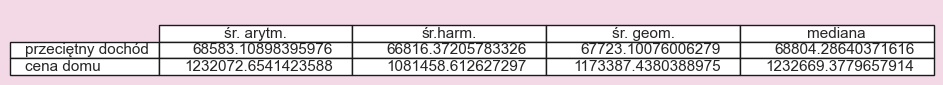

In [12]:
sns.set(rc={"figure.figsize": (10,0.20), 'axes.facecolor':'#f9ecf2', 'figure.facecolor':'#f3d8e5'})

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

pd.plotting.table(ax,położenia_df)  # where df is your data frame

plt.savefig('położenia.png')

In [13]:
rozproszenia_df = pd.DataFrame([income_rozproszenia, price_rozproszenia], 
                       columns = ["Q1","Q3","IQR","wariancja","odchylenie standardowe","współczynnik zmienności"],
                      index = ["przeciętny dochód","cena domu"])

#rozproszenia_df = rozproszenia_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
rozproszenia_df

,Q1,Q3,IQR,wariancja,odchylenie standardowe,współczynnik zmienności
przeciętny dochód,61480.562388,7.578334e+04,14302.776278,1.135701e+08,10656.925361,15.540257
cena domu,997577.135049,1.471210e+06,473633.069163,1.246671e+11,353082.313053,28.660455


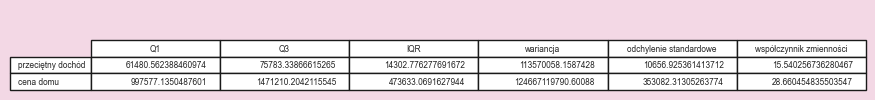

In [14]:
sns.set(rc={"figure.figsize": (10,0.4), 'axes.facecolor':'#f9ecf2', 'figure.facecolor':'#f3d8e5'})

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

pd.plotting.table(ax,rozproszenia_df)  # where df is your data frame

plt.savefig('rozproszenia.png')

In [15]:
inne_df = pd.DataFrame([income_inne, price_inne], 
                       columns = ["współczynnik skośnosci","kurtoza"],
                      index = ["przeciętny dochód","cena domu"])
#inne_df = inne_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
inne_df

,współczynnik skośnosci,kurtoza
przeciętny dochód,-0.033710,0.044329
cena domu,-0.002717,-0.056063


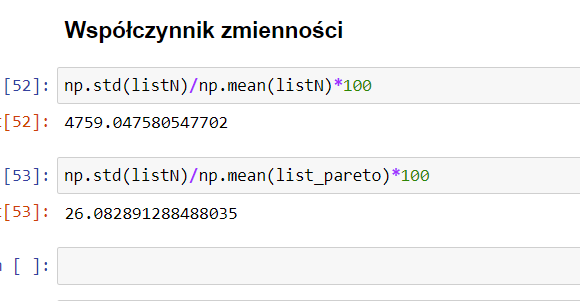

In [16]:
kur = scipy.stats.expon(100).rvs(1000)
scipy.stats.kurtosis(kur)

5.397300697797448

# PLOTOWANIE DANYCH

In [17]:
sns.set(rc={"figure.figsize": (8,4.5), 'axes.facecolor':'#f9ecf2', 'figure.facecolor':'#f3d8e5'})

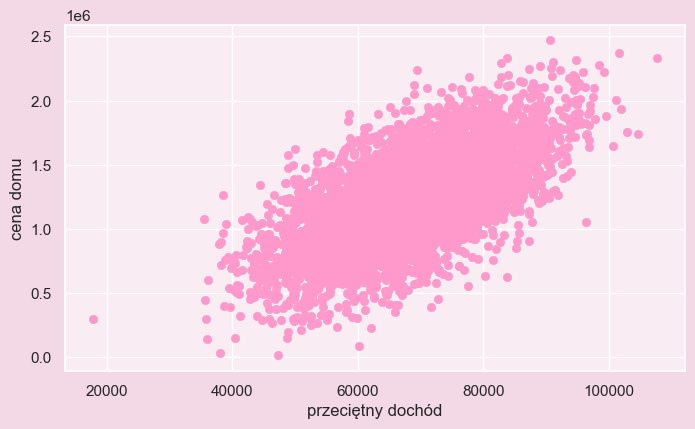

In [18]:
sns.scatterplot(x = income,y = price, color = "#ff99cc", edgecolor = "#ff99cc")
plt.savefig("images/scatter1.pdf", format="pdf", bbox_inches="tight")


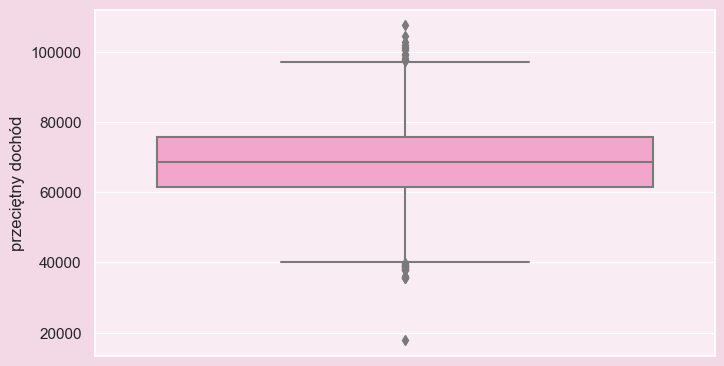

In [19]:
sns.boxplot(data = df, y  = "przeciętny dochód", color = "#ff99cc")
plt.savefig("images/income_box.pdf", format="pdf", bbox_inches="tight")


In [20]:
c = np.mean(income)
d = np.var(income)
print(c,d)

68583.10898395976 113570058.1587428


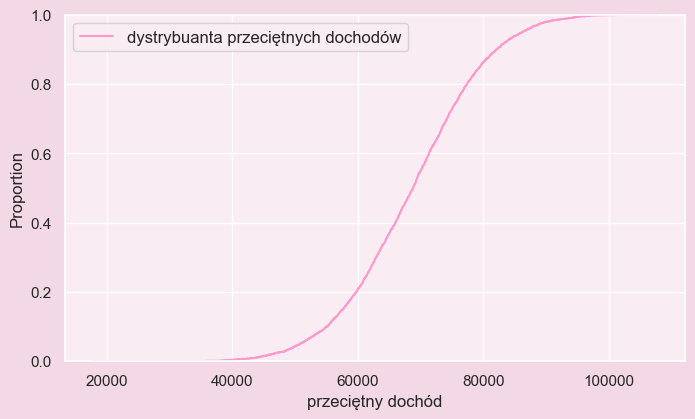

In [21]:
sns.ecdfplot(data = df, x = "przeciętny dochód", color = "#ff99cc")

plt.legend(labels=["dystrybuanta przeciętnych dochodów"],fontsize="12")
plt.savefig("images/income_dystr1.pdf", format="pdf", bbox_inches="tight")

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


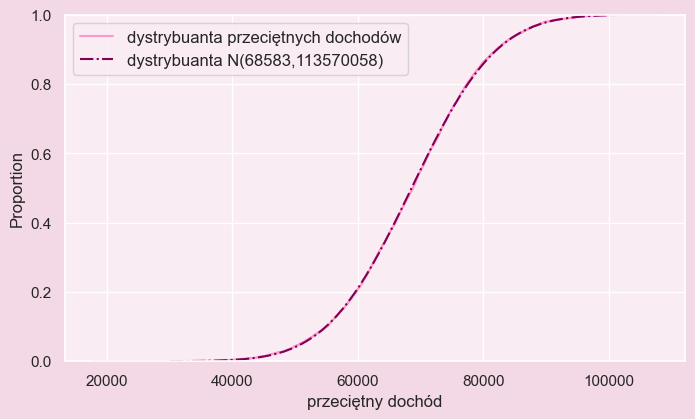

In [22]:
sns.ecdfplot(data = df, x = "przeciętny dochód", color = "#ff99cc")
sns.lineplot(np.arange(30*10**3,100*10**3,100), scipy.stats.norm.cdf(np.arange(30*10**3,100*10**3,100), c,np.sqrt(d)), color = "#800055", linestyle = "-.")

plt.legend(labels=["dystrybuanta przeciętnych dochodów","dystrybuanta N(68583,113570058)"], fontsize="12")
plt.savefig("images/income_dystr.pdf", format="pdf", bbox_inches="tight")


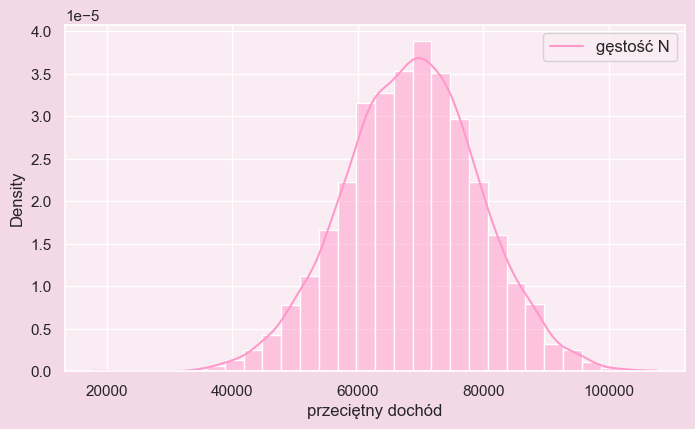

In [23]:
sns.histplot(data = df, x = "przeciętny dochód",bins = 30, kde = True, stat="density", color = "#ff99cc")
plt.savefig("images/income_hist.pdf", format="pdf", bbox_inches="tight")
plt.legend(labels=["gęstość N"], fontsize="12")


C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


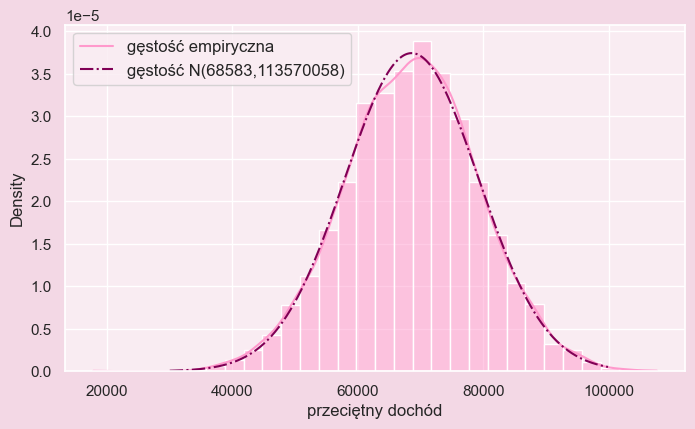

In [24]:
sns.histplot(data = df, x = "przeciętny dochód",bins = 30, kde = True, stat="density", color = "#ff99cc")
plt.savefig("images/income_hist.pdf", format="pdf", bbox_inches="tight")

sns.lineplot(np.arange(30*10**3,100*10**3,100), scipy.stats.norm.pdf(np.arange(30*10**3,100*10**3,100), c,np.sqrt(d)), color = "#800055", linestyle = "-.")
plt.legend(labels = ["gęstość empiryczna","gęstość N(68583,113570058)"], fontsize = "12" )
plt.savefig("images/income_hist_teor.pdf", format="pdf", bbox_inches="tight")

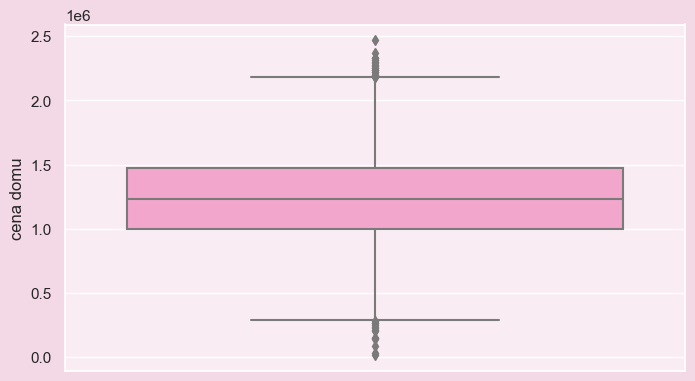

In [25]:
sns.boxplot(data = df, y  = "cena domu", color = "#ff99cc")
plt.savefig("images/price_box.pdf", format="pdf", bbox_inches="tight")


In [26]:
a = np.mean(price)
b = np.var(price)
print(a,b)

1232072.6541423588 124667119790.60088


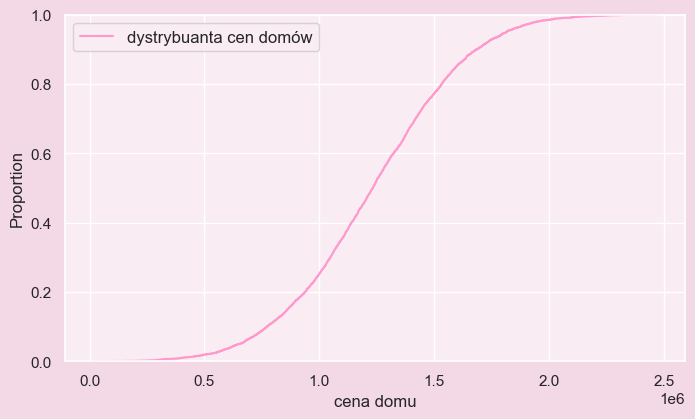

In [27]:
sns.ecdfplot(data = df, x = "cena domu", color = "#ff99cc")
plt.legend(labels=["dystrybuanta cen domów"], fontsize = '12')
plt.savefig("images/price_dystr1.pdf", format="pdf", bbox_inches="tight")


C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


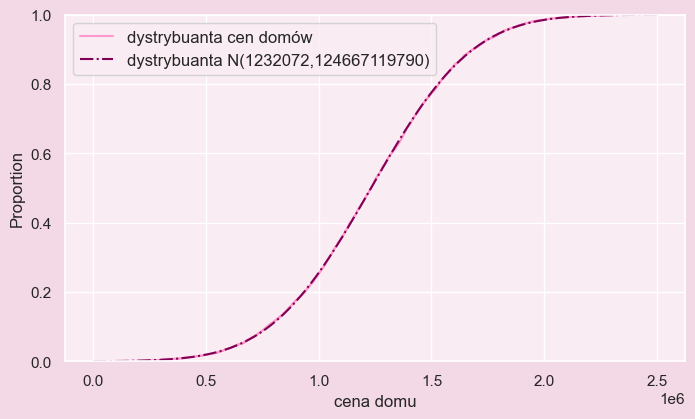

In [28]:
sns.ecdfplot(data = df, x = "cena domu", color = "#ff99cc")
sns.lineplot(np.arange(0,2.5*10**6,100), scipy.stats.norm.cdf(np.arange(0,2.5*10**6,100), a,np.sqrt(b)), color = "#800055", linestyle = "-.")
plt.legend(labels=["dystrybuanta cen domów", "dystrybuanta N(1232072,124667119790)"], fontsize = '12')
plt.savefig("images/price_dystr.pdf", format="pdf", bbox_inches="tight")


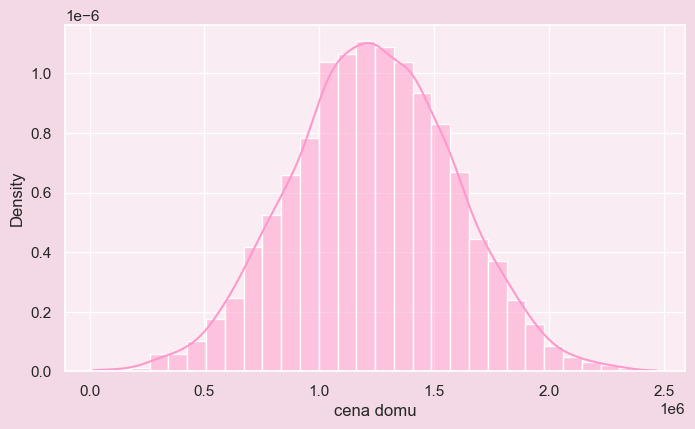

In [29]:
sns.histplot(data = df, x = "cena domu",bins = 30, kde = True, stat="density", color = "#ff99cc")

plt.savefig("images/price_hist.pdf", format="pdf", bbox_inches="tight")


C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


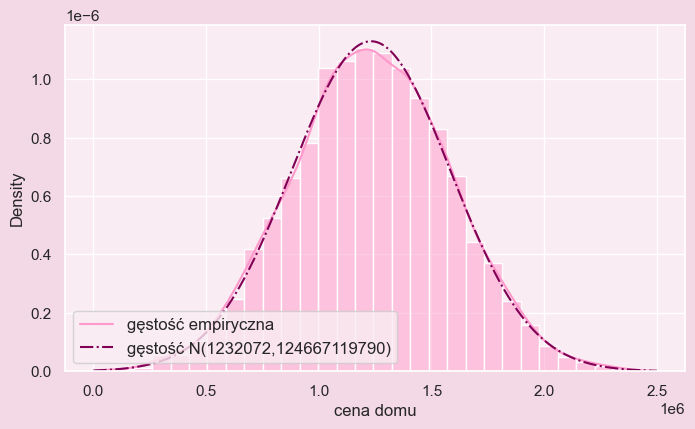

In [30]:
sns.histplot(data = df, x = "cena domu",bins = 30, kde = True, stat="density", color = "#ff99cc")
sns.lineplot(np.arange(0,2.5*10**6,100), scipy.stats.norm.pdf(np.arange(0,2.5*10**6,100), a,np.sqrt(b)), color = "#800055", linestyle = "-.")
plt.legend(labels = ["gęstość empiryczna","gęstość N(1232072,124667119790)"], fontsize = "12", loc = "lower left")
plt.savefig("images/price_hist_teor.pdf", format="pdf", bbox_inches="tight")


# REGRESJA LINIOWA I POZIOM ZALEŻNOŚCI

In [31]:
def B(data2,data3):
    b1 = np.sum(data2*(data3-np.mean(data3))) / np.sum((data2-np.mean(data2))**2)
    b0 = np.mean(data3) - b1*np.mean(data2)
    
    Y = b1*data2 + b0
    
    return [b0,b1,Y]

In [32]:
# parametry regresji
result = B(income, price)
result    

[-221579.47820583847,
 21.19548317193054,
 0       1.556287e+05
 1       5.299003e+05
 2       5.331702e+05
 3       5.371621e+05
 4       5.406807e+05
             ...     
 4995    1.931875e+06
 4996    1.938852e+06
 4997    1.959036e+06
 4998    1.997645e+06
 4999    2.061211e+06
 Name: przeciętny dochód, Length: 5000, dtype: float64]

In [33]:
# parametry regresji
model = sm.OLS(price, sm.add_constant(income)).fit()
model.params   

const               -221579.478206
przeciętny dochód        21.195483
dtype: float64

In [34]:
model.tvalues  # nie wiem co to

const                -8.863133
przeciętny dochód    58.843563
dtype: float64

In [35]:
sse = np.sum((model.fittedvalues - price)**2)
print(sse)

368229703675947.1


In [36]:
# suma błędów
sum(model.fittedvalues - price)

-5.989568307995796e-06

In [37]:
errors = model.fittedvalues - price
len(errors)
np.var(errors)
np.var(errors)

73645940735.18942

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


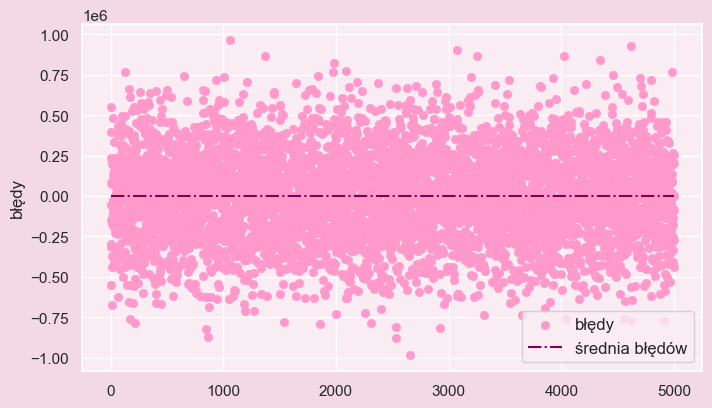

In [38]:
sns.scatterplot(np.arange(0,len(errors)), errors, color = "#ff99cc", edgecolor = "#ff99cc" ).set_ylabel("błędy")
sns.lineplot([0,5000],[np.mean(errors),np.mean(errors)], color ="#800055", linestyle = "-.")
plt.legend(labels = ["błędy","średnia błędów"], fontsize = "12")
plt.savefig("images/resi_scatter.pdf", format="pdf", bbox_inches="tight")

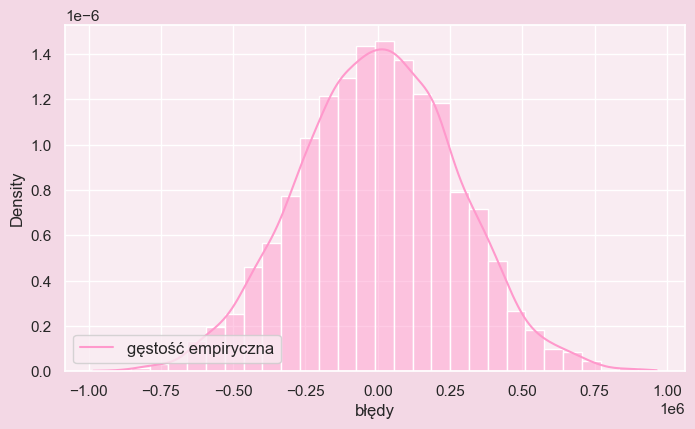

In [39]:
sns.histplot(errors, bins = 30, kde = True, stat="density", color = "#ff99cc").set_xlabel("błędy")

x = np.arange(-1000000,1000000)
plt.savefig("images/errors_hist.pdf", format="pdf", bbox_inches="tight")
plt.legend(labels = ["gęstość empiryczna"], fontsize = "12", loc = "lower left")
plt.savefig("images/resi_hist.pdf", format="pdf", bbox_inches="tight")

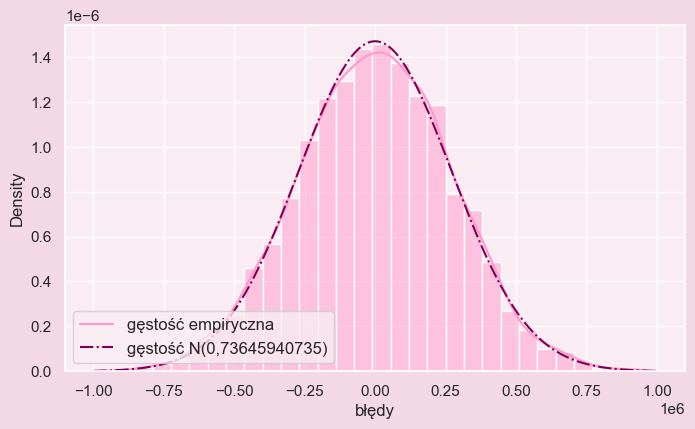

In [40]:
sns.histplot(errors, bins = 30, kde = True, stat="density", color = "#ff99cc").set_xlabel("błędy")

x = np.arange(-1000000,1000000)
plt.plot(x, scipy.stats.norm(0,271377).pdf(x), color = "#800055", linestyle = "-.")
plt.savefig("images/errors_hist.pdf", format="pdf", bbox_inches="tight")
plt.legend(labels = ["gęstość empiryczna","gęstość N(0,73645940735)"], fontsize = "12", loc = "lower left")
plt.savefig("images/resi_hist_teor.pdf", format="pdf", bbox_inches="tight")

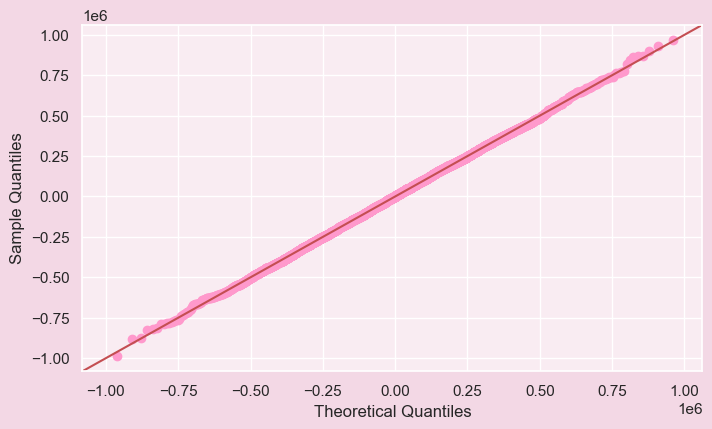

In [41]:
# rozkład błędów
sm.qqplot(model.fittedvalues - price, dist=scipy.stats.norm(0,np.sqrt(73645940735)), line='45', markerfacecolor = "#ff99cc", markeredgecolor = "#ff99cc");
plt.savefig("images/qqplot.pdf", format="pdf", bbox_inches="tight")


In [42]:
def acvf_empir(x, h):
    h = abs(h)
    mean_x = np.mean(x)
    n = len(x)
    
    from_h = x[h:]
    to_nh = x[:n-h]
    
    output = (1/n)*sum((from_h - mean_x)*(to_nh - mean_x))
    return output

def acf_empir(x, h):
    return acvf_empir(x,h)/acvf_empir(x,0)

In [43]:
errors = errors.values

In [44]:
h = np.arange(0,len(errors))
acf_values = [acf_empir(errors,i) for i in h]

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


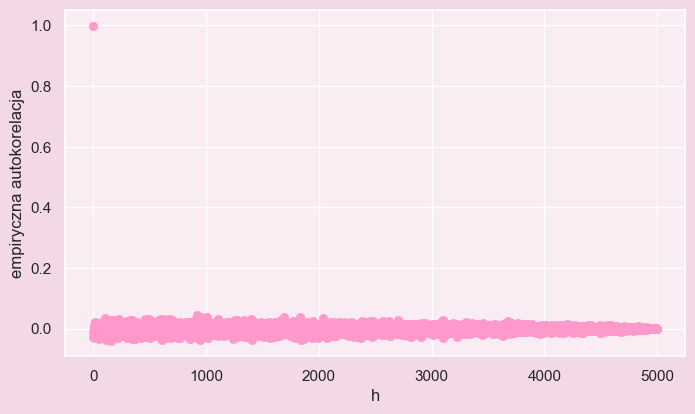

In [45]:
sns.scatterplot(h,acf_values,color = "#ff99cc",edgecolor ="#ff99cc").set_ylabel("empiryczna autokorelacja")
plt.xlabel("h")
plt.savefig("images/acf.pdf", format="pdf", bbox_inches="tight")

In [46]:
acf_empir(errors,10000)

0.0

In [47]:
#calculate ssr
ssr = np.sum((model.fittedvalues - np.mean(price))**2)
print(ssr)

255105895277057.0


In [48]:
#calculate sst
sst = ssr + sse
print(sst)

623335598953004.1


C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


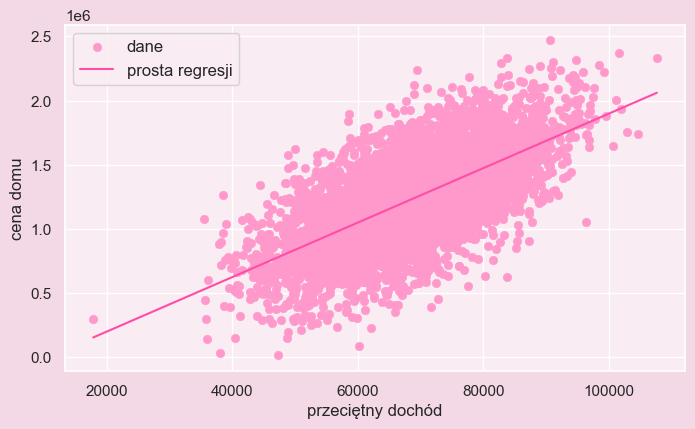

In [49]:
sns.scatterplot(income, price, color = "#ff99cc", label = "dane", edgecolor = "#ff99cc")
sns.lineplot(income, result[2], color = "#ff4da6", label = "prosta regresji")
plt.legend(fontsize = '12')
plt.savefig("images/regresja.pdf", format="pdf", bbox_inches="tight")

In [50]:
corr = np.corrcoef(income, price)
corr

array([[1.        , 0.63973378],
       [0.63973378, 1.        ]])

# PRZIEDZIAŁY UFNOŚCI

In [51]:
np.std(price)

353082.31305263774

In [52]:
#create 95% confidence interval 
scipy.stats.t.interval(alpha=0.95, df=len(price)-1, loc=np.mean(price), scale=scipy.stats.sem(price))

C:\Users\wypyc\AppData\Local\Temp\ipykernel_13756\2855118596.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  scipy.stats.t.interval(alpha=0.95, df=len(price)-1, loc=np.mean(price), scale=scipy.stats.sem(price))


(1222282.5423744407, 1241862.765910277)

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wypyc\anacond

57600000000 271432.1478741036


[0.92, 0.9482]

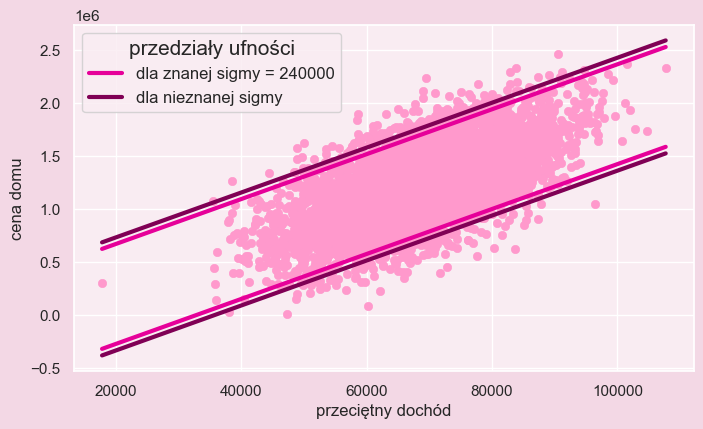

In [53]:
def intervals(data, alpha = 0.05):
    
    #sigma = np.sqrt(np.std(data["Cena domu"]))                                   ##### nie wiem czy takie zakładanie sigmy jest dobre
    sigma = 240000
    x = data["przeciętny dochód"]
    x_mean = np.mean(x)
    n=len(x)
    
    Y = data["cena domu"]
    Y_mean = np.mean(Y)

    q = scipy.stats.norm(0,1).ppf(1-alpha/2)
    t = scipy.stats.t(df=n-1).ppf(1-alpha/2)
    

    B1_est = np.sum((x - x_mean)*Y) / np.sum((x - x_mean)**2)
    B0_est = Y_mean - B1_est * x_mean
    Y_est = B0_est + B1_est*x
    
    S = np.sqrt(1/(n-2)*np.sum((Y-Y_est)**2))

    # krańce przedziałów ufności
    left_sigma = Y_est - q*sigma*np.sqrt((1+1/len(x)+(x-x_mean)**2/np.sum((x-x_mean)**2)))
    right_sigma = Y_est + q*sigma*np.sqrt((1+1/len(x)+(x-x_mean)**2/np.sum((x-x_mean)**2)))
    left_S = Y_est - t*S*np.sqrt((1+1/len(x)+(x-x_mean)**2/np.sum((x-x_mean)**2)))
    right_S = Y_est + t*S*np.sqrt((1+1/len(x)+(x-x_mean)**2/np.sum((x-x_mean)**2)))
    
    # liczenie ile wpadło do przedziału
    sum_sigma = 0
    sum_S = 0
    
    for i in range(len(Y)):
        if left_sigma[i] <= Y[i] <= right_sigma[i]:
            sum_sigma += 1
        if left_S[i] <= Y[i] <= right_S[i]:
            sum_S += 1

            
    sns.scatterplot(x, Y, color = "#ff99cc",edgecolor ="#ff99cc" )
    sns.lineplot(x, left_sigma, color='#e60099', linewidth=3, label = "dla znanej sigmy = 240000")
    sns.lineplot(x, right_sigma, color='#e60099', linewidth=3)
    sns.lineplot(x, left_S, color='#800055', linewidth=3, label = "dla nieznanej sigmy")
    sns.lineplot(x, right_S, color='#800055', linewidth=3)
    
    plt.legend(title = "przedziały ufności", fontsize = '12', title_fontsize = '15')
    plt.savefig("images/przedzialy_ufnosci.pdf", format="pdf", bbox_inches="tight")
    print(sigma**2,S)
    return [sum_sigma / len(Y), sum_S / len(Y)]

intervals(df)


# PREDYKCJA

In [58]:
def predict(data, alpha = 0.05):
    
    data = data.sort_values(by=['przeciętny dochód'])
    sigma = 240000
    x = data["przeciętny dochód"][:-80]
    x_10 = data["przeciętny dochód"][-80:]
    x_mean = np.mean(x)
    n=len(x)

    q = scipy.stats.norm(0,1).ppf(1-alpha/2)
    t = scipy.stats.t(df=n-1).ppf(1-alpha/2)
    
    Y = data["cena domu"][:-80]
    Y_10 = data["cena domu"][-80:]
    Y_mean = np.mean(Y)

    B1_est = np.sum((x - x_mean)*Y) / np.sum((x - x_mean)**2)
    B0_est = Y_mean - B1_est * x_mean
    Y_est = B0_est + B1_est*x
    
    Y_est_10 = B0_est + B1_est*x_10
    S = 1/(n-2)*np.sum((Y-Y_est)**2)
    
    Y_pred = B0_est + B1_est*x_10 + scipy.stats.norm(0,sigma).rvs(80)

    # krańce przedziałów ufności
    left_sigma = Y_est_10 - q*sigma*np.sqrt((1+1/len(x)+(x_10-x_mean)**2/np.sum((x_10-x_mean)**2)))
    right_sigma = Y_est_10 + q*sigma*np.sqrt((1+1/len(x)+(x_10-x_mean)**2/np.sum((x_10-x_mean)**2)))
    left_S = Y_est_10 - t*np.sqrt(S*(1+1/len(x)+(x_10-x_mean)**2/np.sum((x_10-x_mean)**2)))
    right_S = Y_est_10 + t*np.sqrt(S*(1+1/len(x)+(x_10-x_mean)**2/np.sum((x_10-x_mean)**2)))
            

            
    sns.scatterplot(x,Y, color='gray', edgecolor = "gray")
    sns.scatterplot(x_10, Y_10, color="#ff99cc", label='Wartości rzeczywiste', edgecolor ="#ff99cc")
    sns.scatterplot(x_10, Y_pred, color="#d9b3ff", label='Wartości predykowane', edgecolor ="#d9b3ff")
    sns.lineplot(x_10,left_sigma, color='#e60099', linewidth=3, label = "przedział ufności dla \n znanej sigmy = 2400000")
    sns.lineplot(x_10,right_sigma, color='#e60099', linewidth=3)
    sns.lineplot(x_10,left_S, color='#800055', linewidth=3, label = "przedział ufności dla \n nieznanej sigmy")
    sns.lineplot(x_10,right_S, color='#800055', linewidth=3)
    plt.legend(fontsize = '9')
    plt.savefig("images/predykcja.pdf", format="pdf", bbox_inches="tight")
    
predict(df)

KeyError: 0

In [ ]:
def predict(data, alpha = 0.05):
    
    data = data.sort_values(by=['przeciętny dochód'])
    sigma = 240000                                        ##### nie wiem czy takie zakładanie sigmy jest dobre
    
    x = data['przeciętny dochód'][:-80]
    x_10 = data['przeciętny dochód'][-80:]
    x_mean = np.mean(x)
    n=len(x)

    q = scipy.stats.norm(0,1).ppf(1-alpha/2)
    t = scipy.stats.t(df=n-1).ppf(1-alpha/2)
    
    Y = data["cena domu"][:-80]
    Y_10 = data["cena domu"][-80:]
    Y_mean = np.mean(Y)

    B1_est = np.sum((x - x_mean)*Y) / np.sum((x - x_mean)**2)
    B0_est = Y_mean - B1_est * x_mean
    Y_est = B0_est + B1_est*x
    
    Y_est_10 = B0_est + B1_est*x_10
    S = 1/(n-2)*np.sum((Y-Y_est)**2)
    
    Y_pred = B0_est + B1_est*x_10 + scipy.stats.norm(0,sigma).rvs(80)

    # krańce przedziałów ufności
    left_sigma = Y_est_10 - q*sigma*np.sqrt((1+1/len(x)+(x_10-x_mean)**2/np.sum((x_10-x_mean)**2)))
    right_sigma = Y_est_10 + q*sigma*np.sqrt((1+1/len(x)+(x_10-x_mean)**2/np.sum((x_10-x_mean)**2)))
    left_S = Y_est_10 - t*np.sqrt(S*(1+1/len(x)+(x_10-x_mean)**2/np.sum((x_10-x_mean)**2)))
    right_S = Y_est_10 + t*np.sqrt(S*(1+1/len(x)+(x_10-x_mean)**2/np.sum((x_10-x_mean)**2)))
            
    #sns.scatterplot(x,Y, color='gray')
    sns.scatterplot(x_10, Y_10, color="#ff99cc", label='Wartości rzeczywiste')
    sns.scatterplot(x_10, Y_pred, color="#d9b3ff", label='Wartości predykowane')
    sns.lineplot(x_10,left_sigma, color='#e60099', linewidth=3, label = "przedział ufności dla znanej sigmy = 2400000")
    sns.lineplot(x_10,right_sigma, color='#e60099', linewidth=3)
    sns.lineplot(x_10,left_S, color='#800055', linewidth=3, label = "przedział ufności dla nieznanej sigmy")
    sns.lineplot(x_10,right_S, color='#800055', linewidth=3)

    plt.legend(fontsize = '9', loc = 'lower right')
    plt.savefig("images/predykcja_zoom.pdf", format="pdf", bbox_inches="tight")

predict(df)